In [1]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import seaborn as sns
import numpy as np



In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\naabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path = "Scripts TBBT.csv" 
df = pd.read_csv(path , sep = "," , skipinitialspace=True, engine="python")
df.head()


,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard


In [4]:
# list of distinct characters in person_scene column
characters = df['person_scene'].unique()
characters

array(['Scene', 'Sheldon', 'Leonard', 'Receptionist', 'Penny', '(mouths)',
       'back)', 'Howard', 'Raj', 'Raj)', 'buzzer)', 'buzzer', 'Voice',
       'man', 'Man', '(sings)', '(off)', 'together', '(snarkily)',
       '(entering)', 'likewise)', 'off)', 'door)', 'talk)',
       '(internally)', 'mat)', 'him)', 'ear)', 'Teleplay', 'Story',
       'hallway)', 'Doug', 'Lesley', 'instructor', 'Leonard)',
       '(singing)', 'Waitress', 'Summer', 'Sheldon)', 'Gablehouser',
       'round)', 'supplements)', 'Cooper', 'Cooper)', 'chair)',
       '(leaving)', 'quartettist', 'room)', 'apartment)', '(inside)',
       '(arriving)', 'costume)', 'All', 'Thor)', 'off-screen)', 'Girl',
       'Costume', 'Kurt', 'ground)', 'entering)', 'doorway)', 'phone',
       'television)', 'again)', 'Christie', 'Waiter', '(answering)',
       '(voice)', 'within)', 'women)', 'Koothrappali', 'Together',
       'gather)', 'phone)', 'Lalita', 'Penny)', 'embarrassed)',
       'mailbox)', 'glasses)', 'down)', 'floor)', 

In [5]:
def clean_text(text):
    # clean punctuation
    text = re.sub(r"[’!”#$%&()*+,-.:;?@[\]^_`{|}~]", "", str(text))
    # lower
    return text.lower()

In [6]:
def process_words(text):
    # tokenization
    sentences = nltk.tokenize.sent_tokenize(text)
    words = nltk.tokenize.word_tokenize(text)
    # remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filter_words = [word for word in words if word not in stop_words]
    # stemming 
    porter = nltk.stem.PorterStemmer()
    stemmed_words = [porter.stem(word) for word in filter_words]
    return {
        "sentences" : sentences,
        "filtered_words" : filter_words,
        "stemmed_words" : stemmed_words
    }

In [7]:
def pos_ner(text):
    doc = nlp(text)
    pos_tag = [(token.text, token.pos_) for token in doc]
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return {
        "pos_tags": pos_tag,
        "entities" : entities
    }

In [8]:
Amy = df[df['person_scene'].str.contains('Amy')]
data_amy = Amy['dialogue']

processed_data_amy = []
for text in data_amy:
    cleaned = clean_text(text)
    processed = process_words(cleaned)
    ner_pos = pos_ner(" ".join(processed["filtered_words"]))
    processed_data_amy.append({
        "org_text": text,
        "cleaned_text": cleaned,
        "filtered_words": processed["filtered_words"],
        "stemmed_words": processed["stemmed_words"],
        "pos_tags": ner_pos["pos_tags"],
        'entities': ner_pos['entities']
    }
    )

In [8]:
processed_data_amy

[{'org_text': 'Excuse me. I’m Amy Farrah Fowler. You’re Sheldon Cooper.',
  'cleaned_text': 'excuse me im amy farrah fowler youre sheldon cooper',
  'filtered_words': ['excuse',
   'im',
   'amy',
   'farrah',
   'fowler',
   'youre',
   'sheldon',
   'cooper'],
  'stemmed_words': ['excus',
   'im',
   'ami',
   'farrah',
   'fowler',
   'your',
   'sheldon',
   'cooper'],
  'pos_tags': [('excuse', 'NOUN'),
   ('i', 'PRON'),
   ('m', 'VERB'),
   ('amy', 'ADV'),
   ('farrah', 'PROPN'),
   ('fowler', 'PROPN'),
   ('you', 'PRON'),
   ('re', 'VERB'),
   ('sheldon', 'PROPN'),
   ('cooper', 'NOUN')],
  'entities': [('farrah fowler', 'PERSON')]},
 {'org_text': ' If that was slang, I’m unfamiliar with it. If it was literal, I share your aversion to soiled hosiery. In any case, I’m here because my mother and I have agreed that I will date at least once a year.',
  'cleaned_text': ' if that was slang im unfamiliar with it if it was literal i share your aversion to soiled hosiery in any case im h

In [9]:
for i, data in enumerate(processed_data_amy):
    if "pos_tags" not in data:
        print(f"Missing 'pos_tags' in entry {i}: {data_amy}")

In [10]:
Amy['filtered_words'] = [data_amy['filtered_words'] for data_amy in processed_data_amy]
Amy['stemmed_words'] = [data_amy['stemmed_words'] for data_amy in processed_data_amy]
Amy['pos_tags'] = [data_amy["pos_tags"] for data_amy in processed_data_amy]
Amy['entities'] = [data_amy['entities'] for data_amy in processed_data_amy]


C:\Users\naabe\AppData\Local\Temp\ipykernel_19652\3795321010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['filtered_words'] = [data_amy['filtered_words'] for data_amy in processed_data_amy]
C:\Users\naabe\AppData\Local\Temp\ipykernel_19652\3795321010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['stemmed_words'] = [data_amy['stemmed_words'] for data_amy in processed_data_amy]
C:\Users\naabe\AppData\Local\Temp\ipykernel_19652\3795321010.py:3: SettingWithCopyWarning: 
A value is trying to

In [11]:
Amy

,episode_name,dialogue,person_scene,filtered_words,stemmed_words,pos_tags,entities
15116,Series 03 Episode 23 – The Lunar Excitation,Excuse me. I’m Amy Farrah Fowler. You’re Sheld...,Amy,"[excuse, im, amy, farrah, fowler, youre, sheld...","[excus, im, ami, farrah, fowler, your, sheldon...","[(excuse, NOUN), (i, PRON), (m, VERB), (amy, A...","[(farrah fowler, PERSON)]"
15118,Series 03 Episode 23 – The Lunar Excitation,"If that was slang, I’m unfamiliar with it. If...",Amy,"[slang, im, unfamiliar, literal, share, aversi...","[slang, im, unfamiliar, liter, share, avers, s...","[(slang, PROPN), (i, PRON), (m, VERB), (unfami...","[(slang, PERSON), (date least year, DATE)]"
15120,Series 03 Episode 23 – The Lunar Excitation,"I don’t object to the concept of a deity, but...",Amy,"[dont, object, concept, deity, im, baffled, no...","[dont, object, concept, deiti, im, baffl, noti...","[(do, AUX), (nt, PART), (object, VERB), (conce...",[]
15122,Series 03 Episode 23 – The Lunar Excitation,"Noted. Now, before this goes any further, you...",Amy,"[noted, goes, know, forms, physical, contact, ...","[note, goe, know, form, physic, contact, inclu...","[(noted, VERB), (goes, VERB), (know, VERB), (f...",[]
15124,Series 03 Episode 23 – The Lunar Excitation,"Tepid water, please.",Amy,"[tepid, water, please]","[tepid, water, pleas]","[(tepid, NOUN), (water, NOUN), (please, INTJ)]",[]
...,...,...,...,...,...,...,...
54344,Series 10 Episode 24 – The Long Distance Disso...,I was missing you again.,Amy,[missing],[miss],"[(missing, VERB)]",[]
54346,Series 10 Episode 24 – The Long Distance Disso...,She’s what?,Amy,[shes],[she],"[(she, PRON), (s, VERB)]",[]
54348,Series 10 Episode 24 – The Long Distance Disso...,Hi.,Amy,[hi],[hi],"[(hi, INTJ)]",[]
54350,Series 10 Episode 24 – The Long Distance Disso...,Uh-huh. Hang on. (answering phone) Hello. A l...,Amy,"[uhhuh, hang, answering, phone, hello, little,...","[uhhuh, hang, answer, phone, hello, littl, lat...","[(uhhuh, PROPN), (hang, NOUN), (answering, VER...",[]


In [12]:
Amy.to_csv('processed_data_amy.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'processed_data_amy.csv'

## Question 1 

On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

In [13]:
Amy['season'] = Amy['episode_name'].str.extract(r'Series (\d+)').astype(int)
Amy['episode'] = Amy['episode_name'].str.extract(r'Episode (\d+)').astype(int)


C:\Users\naabe\AppData\Local\Temp\ipykernel_19652\2285516059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['season'] = Amy['episode_name'].str.extract(r'Series (\d+)').astype(int)
C:\Users\naabe\AppData\Local\Temp\ipykernel_19652\2285516059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['episode'] = Amy['episode_name'].str.extract(r'Episode (\d+)').astype(int)


In [14]:

def calculate_counts(dialogue):
    sentences = nltk.sent_tokenize(dialogue)
    words = nltk.word_tokenize(dialogue)
    return len(sentences), len(words)


In [15]:
# Apply to calculate sentence and word counts for Amy
Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

amy_stats = Amy.groupby(["season", "episode"]).agg(
    total_sentences =("sentence_count", "sum"),
    total_words = ("word_count", "sum"),
).reset_index()

amy_stats["avg_sentences_per_episode"] = amy_stats["total_sentences"]
amy_stats["avg_words_per_episode"] = amy_stats["total_words"]

amy_season_stats = amy_stats.groupby(["season"]).agg(
    total_sentences =("avg_sentences_per_episode", "mean"),
    total_words = ("avg_words_per_episode", "mean"),
).reset_index()


C:\Users\naabe\AppData\Local\Temp\ipykernel_33320\418221721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
C:\Users\naabe\AppData\Local\Temp\ipykernel_33320\418221721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(


KeyError: 'season'

In [15]:
amy_stats

NameError: name 'amy_stats' is not defined

In [13]:
amy_season_stats

NameError: name 'amy_season_stats' is not defined

In [18]:
# Apply to calculate sentence and word counts for bernadette
Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

amy_stats = Amy.groupby(["season", "episode"]).agg(
    total_sentences =("sentence_count", "sum"),
    total_words = ("word_count", "sum"),
).reset_index()

amy_stats["avg_sentences_per_episode"] = amy_stats["total_sentences"]
amy_stats["avg_words_per_episode"] = amy_stats["total_words"]

amy_season_stats = amy_stats.groupby(["season"]).agg(
    total_sentences =("avg_sentences_per_episode", "mean"),
    total_words = ("avg_words_per_episode", "mean"),
).reset_index()


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/2099337371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(


In [17]:
# tokenize again for counting
def calculate_counts(dialogue):
    sentences = nltk.sent_tokenize(dialogue)
    words = nltk.word_tokenize(dialogue)
    return len(sentences), len(words)

# Apply to function
df[['sentence_count', 'word_count']] = df['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

# Extract season and episode information
df['season'] = df['episode_name'].str.extract(r'Series (\d+)')
df['episode'] = df['episode_name'].str.extract(r'Episode (\d+)')

# Group by season and episode
character_episode_stats = df.groupby(['season', 'episode']).agg(
    total_sentences=('sentence_count', 'sum'),
    total_words=('word_count', 'sum'),
).reset_index()

# Calculate per season avg
season_stats = character_episode_stats.groupby(['season']).agg(
    avg_sentences_per_episode=('total_sentences', 'mean'),
    avg_words_per_episode=('total_words', 'mean')
).reset_index()

# Calculate per season deviations
season_dev = character_episode_stats.groupby(['season']).agg(
    sentences_per_episode_dev=('total_sentences', 'mean'),
    words_per_episode_dev=('total_words', 'mean')
).reset_index()

TypeError: expected string or bytes-like object, got 'float'

In [ ]:
print(season_stats)

## Question 2
Globally, over all episodes within the first 10 seasons, how many times does your character mention nouns, and person names? Make a Wordcloud of this tag/entity to have a clear visualization which nouns/person names are mostly used by your character.


In the function count_nouns, we use a list comprehension to filter out tags that are nouns (tag[1] in ['NOUN']). The len function then counts the number of such tags.
Then we apply count_nouns function to Amy dataframe to create a new column 'noun_count' that count the number of nouns in each row.
Secondly, we groups the DataFrame Amy by season and episode and then aggregates the noun counts within each group. We now obtain a new dataframe Amy_noun_stats, which contains the total noun counts for each season and episode.

In [18]:
# count how many times Amy mention nouns given pos_tags column
def count_nouns(pos_tags):
    return len([tag for tag in pos_tags if tag[1] in ['NOUN']])
Amy['noun_count'] = Amy['pos_tags'].apply(count_nouns)



# sum the noun counts
Amy_noun_stats = Amy.groupby(["season", "episode"]).agg(
    total_nouns =("noun_count", "sum"),
).reset_index()

# Amy
Amy_noun_stats


C:\Users\naabe\AppData\Local\Temp\ipykernel_19652\2762854749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['noun_count'] = Amy['pos_tags'].apply(count_nouns)


,season,episode,total_nouns
0,3,23,19
1,4,1,31
2,4,3,88
3,4,5,53
4,4,8,125
...,...,...,...
149,10,20,34
150,10,21,29
151,10,22,39
152,10,23,48


In the function count_persons, we use a list comprehension to filter out entity that is 'PERSON'. The len function then counts the number of such entity.
Then we apply count_persons function to Amy dataframe to create a new column 'person_count' that count the number of person in each row.
Secondly, we groups the DataFrame Amy by season and episode and then aggregates the person counts within each group. We now obtain a new dataframe Amy_person_stats, which contains the total person counts for each season and episode.

In [19]:
# count how many times Amy mentions person names given entities column
def count_persons(entities):
    return len([ent for ent in entities if ent[1] == 'PERSON'])
Amy['person_count'] = Amy['entities'].apply(count_persons)

# sum the person counts
Amy_person_stats = Amy.groupby(["season", "episode"]).agg(
    total_persons =("person_count", "sum"),
).reset_index()

Amy_person_stats

C:\Users\naabe\AppData\Local\Temp\ipykernel_19652\310168640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['person_count'] = Amy['entities'].apply(count_persons)


,season,episode,total_persons
0,3,23,2
1,4,1,1
2,4,3,1
3,4,5,3
4,4,8,2
...,...,...,...
149,10,20,5
150,10,21,5
151,10,22,1
152,10,23,5


First, we create a new DataFrame Amy_noun from an existing Amy['pos_tags'] column, which contains part-of-speech tags. Each list-like element in the pos_tags column is transformed into separate rows. 

Secondly, we filter the DataFrame to retain only the rows where the pos_tags indicates a noun and create a new column named noun that extracts the actual noun from the pos_tags column by taking the first element (index 0) of the pos_tags string.

Third, we create a new DataFrame Amy_noun_count by grouping the DataFrame Amy_noun by the noun column and counts the occurrences of each noun using the size() method. The Amy_noun_count dataframe is sorted by the count column in descending order

In [20]:
# create a dataframe listing count of nouns and which nouns mentioned by Amy
Amy_nouns = Amy['pos_tags'].explode().reset_index()
Amy_nouns.columns = ['index', 'pos_tags']
# Amy_nouns
# filter only nouns
Amy_nouns = Amy_nouns[Amy_nouns['pos_tags'].str[1] == 'NOUN']
Amy_nouns['noun'] = Amy_nouns['pos_tags'].str[0]
# Amy_nouns

# count the nouns
Amy_noun_count = Amy_nouns.groupby('noun').size().reset_index()
Amy_noun_count.columns = ['noun', 'count']

# sort the nouns by count
Amy_noun_count = Amy_noun_count.sort_values(by='count', ascending=False)
Amy_noun_count

,noun,count
1845,sheldon,174
2136,time,78
1398,night,64
1503,penny,64
1505,people,45
...,...,...
930,haemorrhoids,1
929,gyroscope,1
928,gynecologist,1
927,gynaecologist,1


Finally, we create a word cloud of Amy's dialog based on Amy_noun_count. 

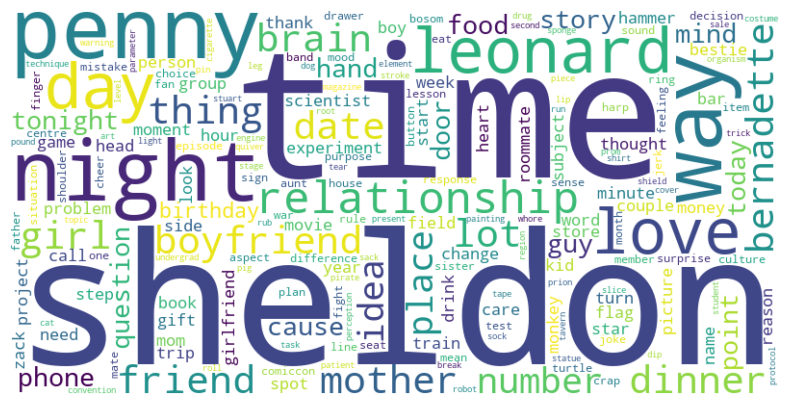

In [21]:
# make a word cloud of the nouns mentioned by Bernadette using Bernadette_noun_count
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(Amy_noun_count['noun']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## Question 4

Examine the co-occurence of words for your character by using the Positive Poin twise Mutual Information measurement. Which words are commonly used together in his/her dialogues? Remark: You can try to make a Word-Word co-occurence matrix.

In [20]:
import ast
df = pd.read_csv('processed_data.csv')


# If df['filtered_words'] contains string representations of lists/dicts:
df['filtered_words'] = df['filtered_words'].apply(lambda x: ast.literal_eval(x))

# Now tokenized_sentences is simply the Series with evaluated values
tokenized_sentences = df['filtered_words']
print(tokenized_sentences)

0       [excuse, im, amy, farrah, fowler, youre, sheld...
1       [slang, im, unfamiliar, literal, share, aversi...
2       [dont, object, concept, deity, im, baffled, no...
3       [noted, goes, know, forms, physical, contact, ...
4                                  [tepid, water, please]
                              ...                        
3415                                            [missing]
3416                                               [shes]
3417                                                 [hi]
3418    [uhhuh, hang, answering, phone, hello, little,...
3419                                          [important]
Name: filtered_words, Length: 3420, dtype: object


In [21]:
# Flatten the list and get unique words
total_words = [word for sentence in tokenized_sentences for word in sentence]
unique_words = list(set(total_words))


# Removing duplicates 
unique_words = list(set(total_words))

# Save or print the result
print(f"Total Words: {len(total_words)}")
print(f"Unique Words: {len(unique_words)}")
print(unique_words[:20])  # Preview 20 unique words

Total Words: 19316
Unique Words: 4812
['lesions', 'change', 'pepper', 'toward', 'gluteus', 'vegetables', 'lonely', 'awfully', 'heaven', 'pull', 'dubbi', 'bikini', 'scallops', 'cleanup', 'bigamy', 'omelette', 'shehulks', 'roomba', 'hidden', 'aby']


In [45]:
#co-occurence matrix with undetermined window size
def build_cooccurrence_matrix(tokenized_sentences, window_size=None):
    unique_words = set(word for sentence in tokenized_sentences for word in sentence)
    unique_words = list(unique_words)
    word_to_id = {word: idx for idx, word in enumerate(unique_words)}
    id_to_word = {idx: word for word, idx in word_to_id.items()}
    cooccurrence_matrix = np.zeros((len(unique_words), len(unique_words)))

    for sentence in tokenized_sentences:
        for idx, word in enumerate(sentence):
            word_id = word_to_id[word]

            # Look at words within the context window
            start = max(idx - window_size, 0)
            end = min(idx + window_size + 1, len(sentence))
            
            for context_idx in range(start, end):
                if idx != context_idx:
                    context_word = sentence[context_idx]
                    context_id = word_to_id[context_word]
                    cooccurrence_matrix[word_id, context_id] += 1

    return cooccurrence_matrix, word_to_id, id_to_word

In [50]:
#compute PPMI

def compute_ppmi(cooccurrence_matrix):
    total_count = np.sum(cooccurrence_matrix)
    word_sums = np.sum(cooccurrence_matrix, axis=1)
    ppmi_matrix = np.zeros_like(cooccurrence_matrix)

    for i in range(cooccurrence_matrix.shape[0]):
        for j in range(cooccurrence_matrix.shape[1]):
            if cooccurrence_matrix[i, j] > 0:
                p_ij = cooccurrence_matrix[i, j] / total_count
                p_i = word_sums[i] / total_count
                p_j = word_sums[j] / total_count
                ppmi = max(np.log2(p_ij / (p_i * p_j)), 0)
                ppmi_matrix[i, j] = ppmi
    return ppmi_matrix

In [61]:
def top_word_pairs(ppmi_matrix, id_to_word, top_n=20):
    word_pairs = []

    # Extracting non-diagonal word pairs where PPMI > 0
    for i in range(ppmi_matrix.shape[0]):
        for j in range(i+1, ppmi_matrix.shape[1]):  # Ignore the diagonal
            if ppmi_matrix[i, j] > 0:
                word_pairs.append((id_to_word[i], id_to_word[j], ppmi_matrix[i, j]))

    # sorting by descending order
    sorted_pairs = sorted(word_pairs, key=lambda x: x[2], reverse=True)
    return sorted_pairs[:top_n]

top_pairs = top_word_pairs(ppmi_matrix, id_to_word, top_n=20)


In [60]:
# Co-occurrence matrix
cooccurrence_matrix, word_to_id, id_to_word = build_cooccurrence_matrix(tokenized_sentences, window_size=2)

# Computing PPMI
ppmi_matrix = compute_ppmi(cooccurrence_matrix)

# Top 20 word pairs
top_pairs = top_word_pairs(ppmi_matrix, id_to_word, top_n=20)

# Results
for word1, word2, score in top_pairs:
    w1_id = word_to_id[word1]
    w2_id = word_to_id[word2]
    # co-occurrence count in the matrix
    co_occurrence_count = cooccurrence_matrix[w1_id, w2_id]  # or cooccurrence_matrix[w2_id, w1_id]
    print(f"{word1} - {word2}: PPMI={score:.2f}, Co-occurrence Count={co_occurrence_count:.0f}")

cleanup - crew: PPMI=15.83, Co-occurrence Count=1
yo - pdog: PPMI=15.83, Co-occurrence Count=1
unit - storage: PPMI=15.83, Co-occurrence Count=1
intended - pun: PPMI=15.83, Co-occurrence Count=1
fruit - lowhanging: PPMI=15.83, Co-occurrence Count=1
sailing - traffic: PPMI=15.83, Co-occurrence Count=1
pigs - freaking: PPMI=15.83, Co-occurrence Count=1
atomic - magnets: PPMI=15.83, Co-occurrence Count=1
bayonets - tuned: PPMI=15.83, Co-occurrence Count=1
episodes - 232: PPMI=15.83, Co-occurrence Count=1
sporting - equipment: PPMI=15.83, Co-occurrence Count=1
mandarin - sings: PPMI=15.83, Co-occurrence Count=1
rising - rapidly: PPMI=15.83, Co-occurrence Count=1
killin - yup: PPMI=15.83, Co-occurrence Count=1
graciously - accept: PPMI=15.83, Co-occurrence Count=1
size - si: PPMI=14.25, Co-occurrence Count=1
quivers - uterus: PPMI=14.25, Co-occurrence Count=1
obsessivecompulsive - disorder: PPMI=14.25, Co-occurrence Count=1
valid - principle: PPMI=13.83, Co-occurrence Count=1
complete - gar

From the output of the top 20 words, we can see that about 15 pairs have a PPMI score of 15.31. Size-si, quivers-uterus and obsessivecompulsive - disorder have a PPMI score of 14.25 and valid-principle, and complete-garbage have a PPMI score of 13.83. We can see that the co-occurence count for each of these pairs is just 1. We build another co-occurence matrix with a windows size of 5 to compare.

In [66]:
# Considering a windowsize = 5
cooccurrence_matrix2, word_to_id2, id_to_word2 = build_cooccurrence_matrix(tokenized_sentences, window_size=5)
ppmi_matrix2 = compute_ppmi(cooccurrence_matrix2)
top_pairs2 = top_word_pairs(ppmi_matrix2, id_to_word2, top_n=20)

# Results
for word1, word2, score in top_pairs2:
    w1_id2 = word_to_id2[word1]
    w2_id2 = word_to_id2[word2]
    # co-occurrence count in the matrix
    co_occurrence_count2 = cooccurrence_matrix2[w1_id2, w2_id2]  # or cooccurrence_matrix[w2_id, w1_id]
    print(f"{word1} - {word2}: PPMI={score:.2f}, Co-occurrence Count={co_occurrence_count:.0f}")

cleanup - crew: PPMI=16.77, Co-occurrence Count=1
yo - pdog: PPMI=16.77, Co-occurrence Count=1
unit - storage: PPMI=16.77, Co-occurrence Count=1
intended - pun: PPMI=16.77, Co-occurrence Count=1
fruit - lowhanging: PPMI=16.77, Co-occurrence Count=1
sailing - traffic: PPMI=16.77, Co-occurrence Count=1
pigs - freaking: PPMI=16.77, Co-occurrence Count=1
atomic - magnets: PPMI=16.77, Co-occurrence Count=1
bayonets - tuned: PPMI=16.77, Co-occurrence Count=1
episodes - 232: PPMI=16.77, Co-occurrence Count=1
sporting - equipment: PPMI=16.77, Co-occurrence Count=1
mandarin - sings: PPMI=16.77, Co-occurrence Count=1
rising - rapidly: PPMI=16.77, Co-occurrence Count=1
killin - yup: PPMI=16.77, Co-occurrence Count=1
graciously - accept: PPMI=16.77, Co-occurrence Count=1
valid - principle: PPMI=14.77, Co-occurrence Count=1
complete - garbage: PPMI=14.77, Co-occurrence Count=1
mike - tyson: PPMI=14.77, Co-occurrence Count=1
mike - degrasse: PPMI=14.77, Co-occurrence Count=1
pub - suggested: PPMI=14

From the above, we see a boost in the PPMI scores across the board, due to the change in baseline probablilities for individual words. The counts are still 1 for each pair, however we see that the last 3 pairs are now different. This makes sense as PPMI is determined by the probability of the pair occuring compared to the individual probabilities of the words. A higher score is attributed to the co-occurence of rare words. For more common words, their co-occurence is more expected hence why they may have a lower PPMI score. So now we see that size -si, quivers - uterus, and obsessivecomplusive - disorder are no longer in the top 20. But mike - tyson, mike - degrasse, pub - suggested now appear in the top 20. 


In [67]:
# Total co-occurence count for each word in top pairs, window size = 2

unique_words_top = set([w1 for w1, w2, _ in top_pairs] + [w2 for w1, w2, _ in top_pairs])

# Compute frequency counts for each word
# Assuming cooccurrence_matrix and word_to_id are defined
word_counts = {}
for w in unique_words_top:
    w_id = word_to_id[w]
    # Sum the row corresponding to w to get its total co-occurrence count
    frequency = np.sum(cooccurrence_matrix[w_id, :])
    word_counts[w] = frequency

# Create a DataFrame from the dictionary
freq_df = pd.DataFrame(list(word_counts.items()), columns=["Word", "Frequency"])

# Optionally, sort by frequency in descending order
freq_df = freq_df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

# Display the table
print(freq_df)


                   Word  Frequency
0                uterus        3.0
1                  size        3.0
2              disorder        3.0
3              complete        2.0
4             principle        2.0
5               garbage        2.0
6                 valid        2.0
7               sailing        1.0
8                rising        1.0
9                    si        1.0
10              rapidly        1.0
11                  232        1.0
12                tuned        1.0
13             episodes        1.0
14                 pigs        1.0
15                  pun        1.0
16              traffic        1.0
17                 pdog        1.0
18              magnets        1.0
19               accept        1.0
20           lowhanging        1.0
21              quivers        1.0
22                sings        1.0
23             mandarin        1.0
24             sporting        1.0
25                   yo        1.0
26               atomic        1.0
27  obsessivecompuls

Looking at the frequency counts for the words in the co-occurence matrix for window size =2, we do indeed see that, uterus, size, and disorder occured 3 times in a pair with other words.  This then explains why size -si, quivers - uterus, and obsessivecomplusive - disorder were dropped when the window size increased, as they are more expected to pair with other words than the other words on the list. 


In [62]:
# Heat map function

def word_pair_heatmap(ppmi_matrix, top_pairs, word_to_id):

    # Extract words and build sub-matrix
    words = list(set([w1 for w1, w2, _ in top_pairs] + [w2 for w1, w2, _ in top_pairs]))
    word_indices = [word_to_id[w] for w in words if w in word_to_id]
    
    # Extract relevant sub-matrix
    sub_matrix = ppmi_matrix[np.ix_(word_indices, word_indices)]

    # Create DataFrame for visualization
    df = pd.DataFrame(sub_matrix, index=words, columns=words)
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df, cmap="rocket", annot=True, fmt=".2f", linewidths=.5)
    plt.title("Top Word Pair Co-occurrence Heatmap (PPMI)")
    plt.show()

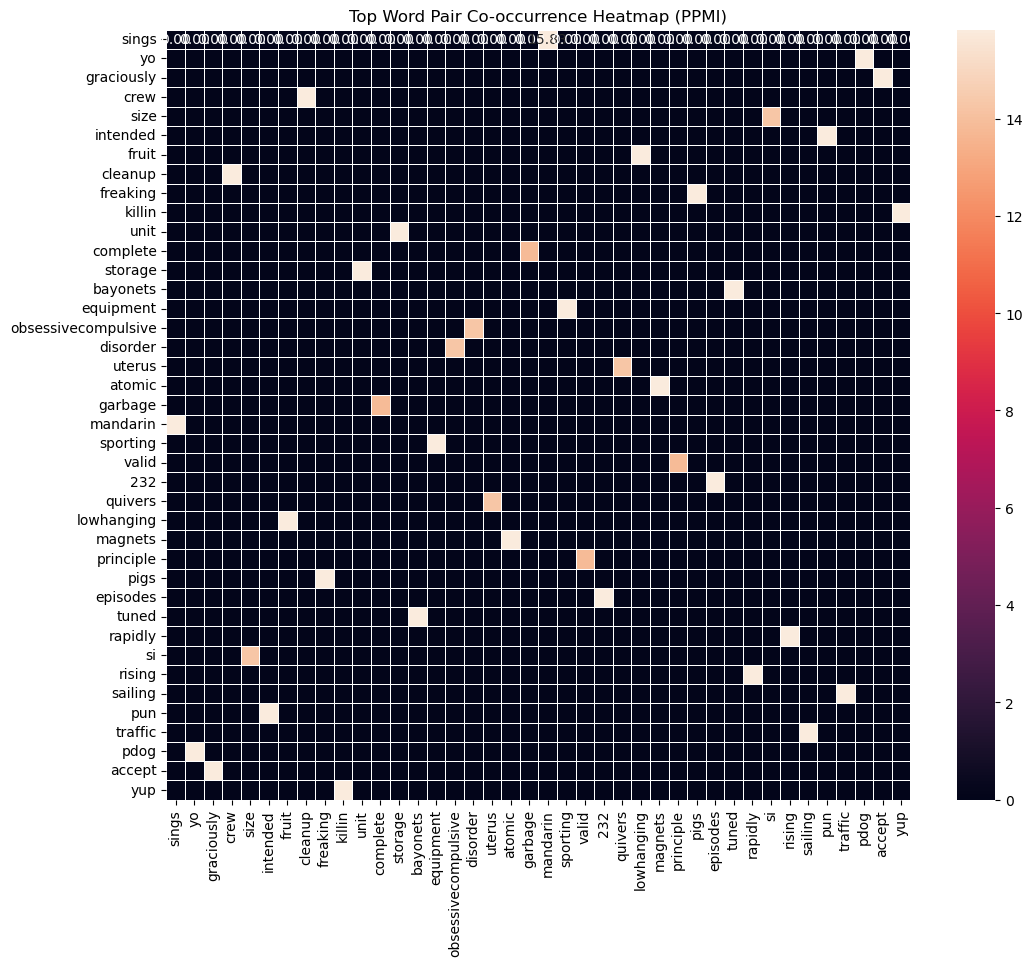

In [55]:
# Visualisation of the top 20 pair of words based on a window size of 2. 
word_pair_heatmap(ppmi_matrix, top_pairs, word_to_id)